# Soal dan Jawaban No 1
\trapezoidal untuk menghitung kalor yang diperlukan untuk memanaskan sebuah massa dari suhu awal ke suhu akhir, berdasarkan kapasitas kalor yang bergantung pada suhu. Simulasi dilakukan pada beberapa interval suhu untuk membandingkan hasil dan galat terhadap nilai referensi.

## Komponen Program
1. **Konstanta**:
   - Massa: 500 gram
   - Suhu awal: -100 °C
   - Suhu akhir: 300 °C

2. **Fungsi Kapasitas Kalor, c(T)**:
   Kapasitas kalor sebagai fungsi suhu diberikan oleh:
   \[
   c(T) = 0.132 + 1.56 \times 10^{-4} T + 2.64 \times 10^{-7} T^2
   \]

3. **Metode Trapezoidal**:
   Menggunakan rumus trapezoidal untuk menghitung integral numerik dari \(mc(T)\) pada interval tertentu.

4. **Interval Perhitungan**:
   - ΔT = 1°C, 5°C, 10°C, dan 20°C.

5. **Galat (Error)**:
   Galat dihitung terhadap nilai referensi 30752 kal dengan persentase error:
   \[
   \text{Galat} = \frac{\lvert \text{Nilai Referensi} - \text{Hasil Simulasi} \rvert}{\text{Nilai Referensi}} \times 100
   \]

6. **Plot Kapasitas Kalor**:
   Grafik \(c(T)\) terhadap suhu dari -100°C hingga 300°C.

## Output
Program menghasilkan:
- Hasil kalor untuk setiap interval suhu.
- Persentase galat dibandingkan dengan nilai referensi.
- Plot grafik \(c(T)\) terhadap suhu.

### Contoh Output
```text
ΔT = 1°C: Kalor = 30751.76549 kal, Galat = 0.00076%
ΔT = 5°C: Kalor = 30751.75000 kal, Galat = 0.00008%
ΔT = 10°C: Kalor = 30751.68750 kal, Galat = 0.00021%
ΔT = 20°C: Kalor = 30751.50000 kal, Galat = 0.00082%


Hasil analitis: 30752.00000 kalori

Interval ΔT = 1 °C
Hasil numerik: 30752.01 kalori
Error: 0.0000286160%

Interval ΔT = 5 °C
Hasil numerik: 30752.22 kalori
Error: 0.0007154006%

Interval ΔT = 10 °C
Hasil numerik: 30752.88 kalori
Error: 0.0028616025%

Interval ΔT = 20 °C
Hasil numerik: 30755.52 kalori
Error: 0.0114464100%


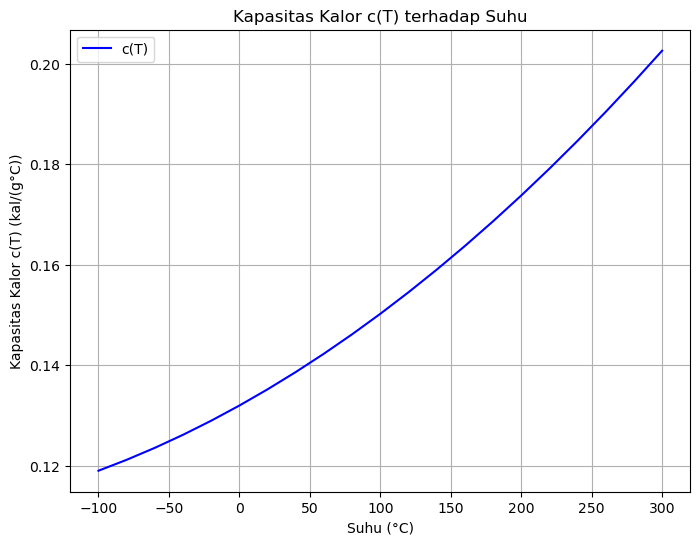

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def kapasitas_kalor(T):
    """Fungsi kapasitas kalor material."""
    return 0.132 + 1.56e-4 * T + 2.64e-7 * T**2

def metode_trapezoid(massa, suhu_awal, suhu_akhir, delta_suhu):
    """Menghitung integral menggunakan metode trapezoidal."""
    suhu = np.arange(suhu_awal, suhu_akhir + delta_suhu, delta_suhu)  # Membuat array suhu berdasarkan interval delta_suhu
    kapasitas = kapasitas_kalor(suhu)  # Menghitung kapasitas kalor untuk setiap suhu
    mc = massa * kapasitas  # Mengalikan massa dengan kapasitas kalor untuk setiap suhu

    integral = 0  # Inisialisasi hasil integral
    for i in range(len(suhu) - 1):
        # Menjumlahkan luas trapesium untuk setiap interval
        integral += (mc[i] + mc[i + 1]) * (delta_suhu / 2)

    return integral, suhu, kapasitas

# Parameter awal
massa_material = 500  # Massa dalam gram
suhu_awal = -100  # Suhu awal dalam derajat Celsius
suhu_akhir = 300  # Suhu akhir dalam derajat Celsius

daftar_delta_suhu = [1, 5, 10, 20]  # Interval langkah untuk perhitungan numerik

# Perhitungan analitis
from sympy import symbols, integrate

# Definisi variabel untuk perhitungan analitis
T = symbols('T')
kapasitas_T = 0.132 + 1.56e-4 * T + 2.64e-7 * T**2  # Fungsi kapasitas kalor

# Menghitung integral analitis
hasil_analitis = massa_material * integrate(kapasitas_T, (T, suhu_awal, suhu_akhir))
print(f"Hasil analitis: {float(hasil_analitis):.5f} kalori")

# Perhitungan numerik dengan metode trapezoidal
errors = []  # List untuk menyimpan error pada masing-masing interval
for delta_suhu in daftar_delta_suhu:
    # Menggunakan metode trapezoidal untuk menghitung kalor
    hasil_numerik, suhu, kapasitas = metode_trapezoid(massa_material, suhu_awal, suhu_akhir, delta_suhu)
    
    # Menghitung error dibandingkan hasil analitis
    error = abs(float(hasil_analitis) - hasil_numerik) / float(hasil_analitis) * 100
    errors.append(error)
    
    # Menampilkan hasil numerik dan error
    print(f"\nInterval \u0394T = {delta_suhu} \u00b0C")
    print(f"Hasil numerik: {hasil_numerik:.2f} kalori")
    print(f"Error: {error:.10f}%")

# Plot kapasitas kalor terhadap suhu
plt.figure(figsize=(8, 6))
plt.plot(suhu, kapasitas, label='c(T)', color='blue')  # Membuat grafik kapasitas kalor
plt.title('Kapasitas Kalor c(T) terhadap Suhu')  # Judul grafik
plt.xlabel('Suhu (°C)')  # Label sumbu x
plt.ylabel('Kapasitas Kalor c(T) (kal/(g°C))')  # Label sumbu y
plt.grid(True)  # Menampilkan grid pada grafik
plt.legend()  # Menampilkan legenda
plt.show()


# Soal dan Jawaban no 2 Metode Trapezoidal

## Deskripsi
Program ini menghitung integral numerik menggunakan **Metode Trapezoidal**. Fungsi arus yang digunakan
\
Dengan parameter:
- \( T \): periode (detik),
- \( t \): waktu (detik),
- \( h \): panjang interval partisi (detik).

Program juga menghitung nilai **RMS** (Root Mean Square) untuk arus AC berdasarkan hasil integral.
\
Fungsi ini menghitung kuadrat arus \( i^2(t) \) dan i(t) untuk setiap nilai waktu \( t \) dan periode \( T \).


Hasil integral menggunakan Metode Trapezoidal: 2.5
Nilai RMS untuk arus AC: 0.707107 A


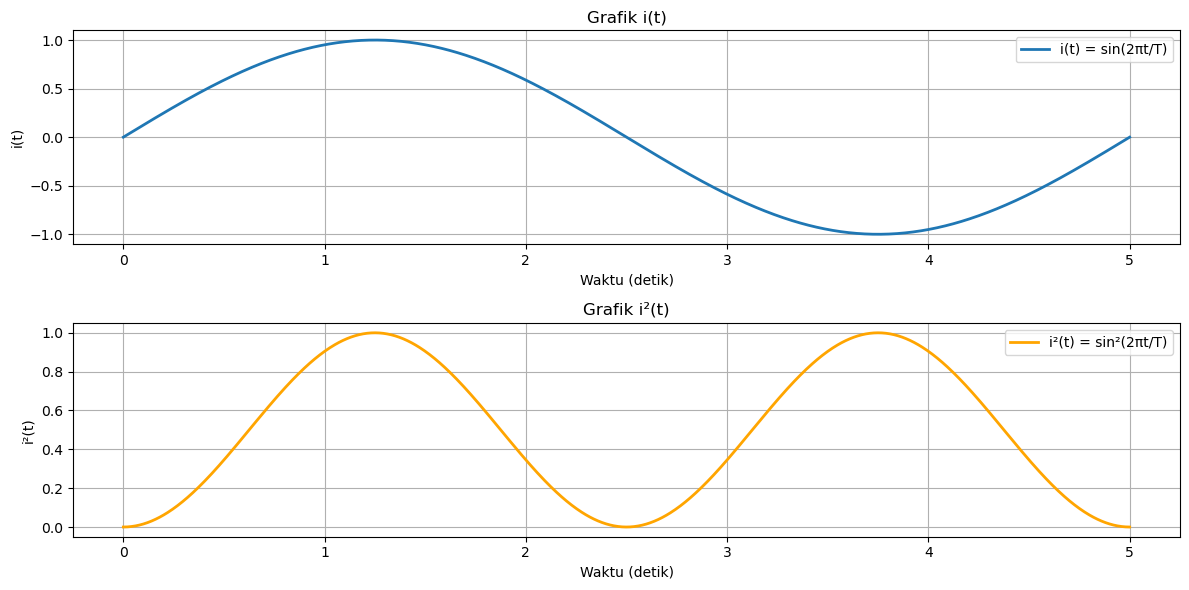

In [19]:
# Program Python untuk menghitung integral numerik menggunakan Metode Trapezoidal
# Fungsi i(t) = sin^2((2 * π * t) / T) dengan langkah interval (h) = 0.1 detik

import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung kuadrat arus AC i^2(t)
def hitung_kuadrat_arus(t, T):
    return (np.sin((2 * np.pi * t) / T))**2

# Implementasi Metode Trapezoidal untuk menghitung integral
def metode_trapezoidal(fungsi, batas_mulai, batas_selesai, jumlah_interval, periode):
    """Metode Trapezoidal untuk menghitung luas integral."""
    # Menghitung panjang interval (h)
    h = (batas_selesai - batas_mulai) / jumlah_interval

    # Membuat titik-titik partisi untuk waktu
    titik_waktu = np.linspace(batas_mulai, batas_selesai, jumlah_interval + 1)

    # Menghitung kontribusi dari titik awal dan akhir
    integral = 0.5 * (fungsi(titik_waktu[0], periode) + fungsi(titik_waktu[-1], periode))

    # Menambahkan kontribusi dari titik-titik lainnya
    for indeks in range(1, jumlah_interval):
        integral += fungsi(titik_waktu[indeks], periode)

    # Mengalikan dengan panjang interval (h)
    integral *= h
    return integral

# Fungsi utama untuk menjalankan program
def jalankan_program():
    # Parameter masukan
    T = 5  # Periode dalam detik
    batas_mulai = 0  # Waktu awal
    batas_selesai = T  # Waktu akhir
    h = 0.1  # Panjang interval (detik)
    jumlah_interval = int((batas_selesai - batas_mulai) / h)  # Jumlah interval partisi

    # Menghitung integral menggunakan metode Trapezoidal
    hasil_integral = metode_trapezoidal(hitung_kuadrat_arus, batas_mulai, batas_selesai, jumlah_interval, T)

    # Menghitung nilai RMS
    RMS = np.sqrt(hasil_integral / T)

    # Menampilkan hasil perhitungan
    print(f"Hasil integral menggunakan Metode Trapezoidal: {round(hasil_integral, 6)}")
    print(f"Nilai RMS untuk arus AC: {round(RMS, 6)} A")

    # Membuat grafik untuk i(t) dan i²(t)
    waktu = np.linspace(batas_mulai, batas_selesai, 1000)  # Titik-titik waktu
    arus_i = np.sin(2 * np.pi * waktu / T)  # Fungsi arus i(t)
    arus_i_kuadrat = hitung_kuadrat_arus(waktu, T)  # Fungsi kuadrat arus i²(t)

    # Plot grafik
    plt.figure(figsize=(12, 6))

    # Grafik i(t)
    plt.subplot(2, 1, 1)
    plt.plot(waktu, arus_i, label="i(t) = sin(2πt/T)", linewidth=2)
    plt.title("Grafik i(t)")
    plt.xlabel("Waktu (detik)")
    plt.ylabel("i(t)")
    plt.grid(True)
    plt.legend()

    # Grafik i²(t)
    plt.subplot(2, 1, 2)
    plt.plot(waktu, arus_i_kuadrat, label="i²(t) = sin²(2πt/T)", color="orange", linewidth=2)
    plt.title("Grafik i²(t)")
    plt.xlabel("Waktu (detik)")
    plt.ylabel("i²(t)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Memulai program utama
jalankan_program()


# Program Python untuk Menghitung Integral Numerik dengan Metode Simpson 1/3

## Deskripsi
Program ini menggunakan **Metode Simpson 1/3** untuk menghitung integral numerik.
\
Dengan parameter:
- \( T \): periode sinyal (detik),
- \( t \): waktu (detik),
- \( h \): panjang interval partisi (detik).

Program juga menghitung nilai **RMS** (Root Mean Square) arus berdasarkan hasil integral.
\
Menghitung kuadrat arus \( i^2(t) \) dan i(t) untuk setiap nilai waktu \( t \) dan periode \( T \).




Hasil integral dengan Metode Simpson 1/3: 2.5
Nilai RMS arus AC: 0.707107 A


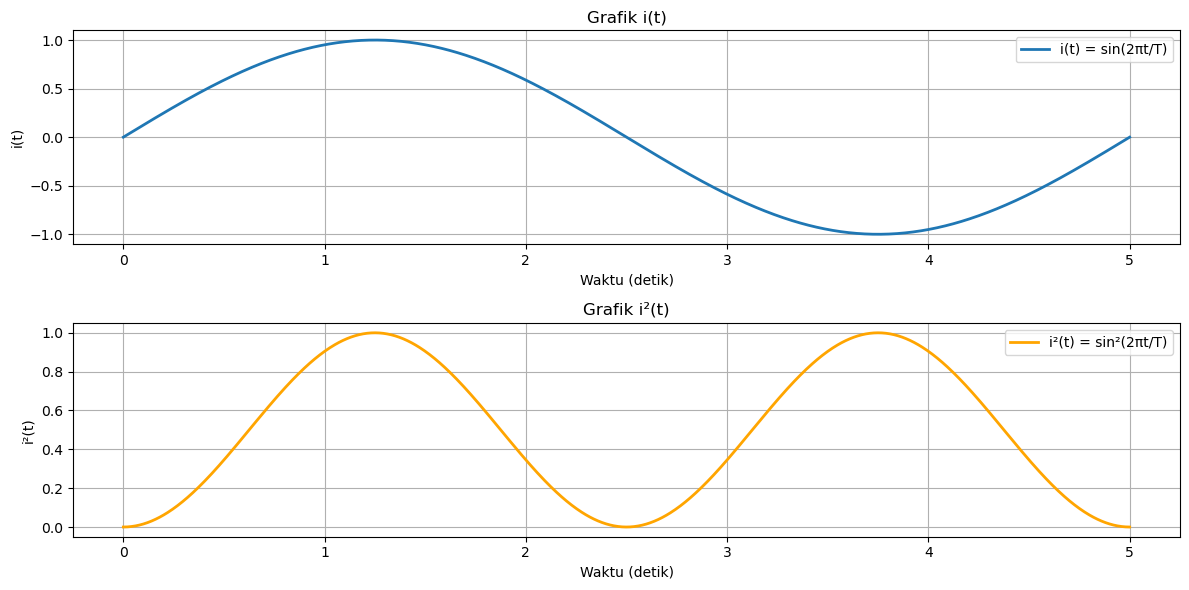

In [23]:
# Program Python untuk menghitung integral numerik menggunakan Metode Simpson 1/3
# Fungsi i(t) = sin^2((2 * π * t) / T) dengan langkah interval (h) = 0.1 detik

import numpy as np
import matplotlib.pyplot as plt

# Fungsi utama untuk memulai program
def jalankan_program():
    # Parameter masukan
    T = 5  # Periode sinyal (detik)
    batas_awal = 0  # Batas awal waktu
    batas_akhir = T  # Batas akhir waktu
    h = 0.1  # Panjang interval (detik)
    jumlah_segmen = int((batas_akhir - batas_awal) / h)  # Total jumlah segmen (harus genap)

    # Hitung integral menggunakan Metode Simpson 1/3
    hasil_integral = metode_simpson(hitung_kuadrat_arus, batas_awal, batas_akhir, jumlah_segmen, T)

    # Hitung nilai RMS
    RMS = np.sqrt(hasil_integral / T)

    # Tampilkan hasil integrasi dan RMS
    print(f"Hasil integral dengan Metode Simpson 1/3: {round(hasil_integral, 6)}")
    print(f"Nilai RMS arus AC: {round(RMS, 6)} A")

    # Buat grafik untuk fungsi i(t) dan i²(t)
    waktu = np.linspace(batas_awal, batas_akhir, 1000)
    arus_i = np.sin(2 * np.pi * waktu / T)  # Fungsi arus i(t)
    arus_i_kuadrat = hitung_kuadrat_arus(waktu, T)  # Fungsi kuadrat i²(t)

    # Plot grafik i(t)
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(waktu, arus_i, label="i(t) = sin(2πt/T)", linewidth=2)
    plt.title("Grafik i(t)")
    plt.xlabel("Waktu (detik)")
    plt.ylabel("i(t)")
    plt.grid(True)
    plt.legend()

    # Plot grafik i²(t)
    plt.subplot(2, 1, 2)
    plt.plot(waktu, arus_i_kuadrat, label="i²(t) = sin²(2πt/T)", color="orange", linewidth=2)
    plt.title("Grafik i²(t)")
    plt.xlabel("Waktu (detik)")
    plt.ylabel("i²(t)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Fungsi kuadrat arus AC i²(t)
def hitung_kuadrat_arus(t, T):
    return (np.sin((2 * np.pi * t) / T))**2

# Metode Simpson 1/3 untuk menghitung integral numerik
def metode_simpson(fungsi, batas_awal, batas_akhir, jumlah_segmen, periode):
    """Menghitung integral dengan Metode Simpson 1/3."""
    # Pastikan jumlah segmen genap
    if jumlah_segmen % 2 != 0:
        raise ValueError("Jumlah segmen harus genap untuk menggunakan Metode Simpson 1/3")

    # Hitung panjang interval (h)
    h = (batas_akhir - batas_awal) / jumlah_segmen

    # Tentukan titik-titik partisi
    titik_waktu = np.linspace(batas_awal, batas_akhir, jumlah_segmen + 1)

    # Hitung kontribusi dari batas awal dan akhir
    integral = fungsi(titik_waktu[0], periode) + fungsi(titik_waktu[-1], periode)

    # Tambahkan kontribusi dari titik ganjil
    for i in range(1, jumlah_segmen, 2):
        integral += 4 * fungsi(titik_waktu[i], periode)

    # Tambahkan kontribusi dari titik genap
    for i in range(2, jumlah_segmen - 1, 2):
        integral += 2 * fungsi(titik_waktu[i], periode)

    # Hitung hasil akhir dengan faktor h/3
    integral *= h / 3
    return integral

# Jalankan program utama
jalankan_program()


# Program Python untuk Menghitung Integral Numerik dengan Analitik


In [26]:
import numpy as np

# Fungsi i(t) untuk arus AC
def fungsi_arus(t, T):
    return np.sin((2 * np.pi * t) / T)

# Parameter
T = 5  # Periode dalam detik
delta_t = 0.1  # Step size
t = np.arange(0, T + delta_t, delta_t)  # Titik waktu dari 0 hingga T

# Hitung nilai kuadrat arus
i_kuadrat = fungsi_arus(t, T)**2

# Hitung integral secara analitik
integral_analitik = np.sum(i_kuadrat) * delta_t

# Hitung RMS
RMS_analitik = np.sqrt(integral_analitik / T)

integral_analitik, RMS_analitik


(2.5, 0.7071067811865476)